<a href="https://colab.research.google.com/github/ddebashish21/Diabetes-Prediction-using-ML-models/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of diabetes using ML models:** Using Python we are trying to determine the possibilities of an individual developing diabetes using various independent features

In [1]:
import numpy as np #importing all the essential libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/diabetes_prediction_dataset.csv', nrows=5000) #Extracting the data from the csv file
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


The features we have in the dataset are:
*   **gender**: Gender refers to the biological sex of the individual.
*   age: Age refers to the current age of the individual.
*   **hypertension**: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated.
*   **heart_disease**: Heart disease is another medical condition which weakens the heart.
*   **smoking_history**: Smoking history is the information about smoking status of the individual.
*   **bmi**: BMI (Body Mass Index) is a measure of body fat based on weight and height.
*   **HbA1c_level**: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months.
*   **blood_glucose_level**: Blood glucose level refers to the amount of glucose in the bloodstream at a given time.
*   **diabetes**: Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.

In [3]:
data.shape #checking the shape of the data

(5000, 9)

In [4]:
data.isnull().sum() #checking for null values

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5000 non-null   object 
 1   age                  5000 non-null   float64
 2   hypertension         5000 non-null   int64  
 3   heart_disease        5000 non-null   int64  
 4   smoking_history      5000 non-null   object 
 5   bmi                  5000 non-null   float64
 6   HbA1c_level          5000 non-null   float64
 7   blood_glucose_level  5000 non-null   int64  
 8   diabetes             5000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 351.7+ KB


**Data Preprocessing**

In [6]:
# Checking for the unique values in all the columns
data.nunique()

,0
gender,2
age,101
hypertension,2
heart_disease,2
smoking_history,6
bmi,1896
HbA1c_level,18
blood_glucose_level,18
diabetes,2


Unique values of each categorical columns

In [7]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [8]:
data.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

Here 'No Info' means null value so we can replace it with NaN

In [9]:
data.smoking_history.replace('No Info', np.nan, inplace=True)

**Dealing with the missing values**

In [10]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,1768
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [11]:
data.smoking_history.isnull().sum()*100/data.shape[0]

35.36

In smoking history we have more than 35% null values and we cannot drop these values as well since the number is quite large so we have to try filling it

In [12]:
# Filling the missing values with mode
from sklearn.impute import SimpleImputer
data_mode=data.copy(deep=True)
imputer=SimpleImputer(strategy='most_frequent')
data_mode.loc[:, ['smoking_history']]=imputer.fit_transform(data_mode.loc[:, ['smoking_history']])

In order to explore other multivariate options for filling the missing values we have to encode the categorical columns in the dataset.

**Data Encoding**

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
data_en=data.copy(deep=True)
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), ['gender'])], remainder='passthrough', verbose_feature_names_out=False)
data_en=ct.fit_transform(data_en)
data_en=pd.DataFrame(data_en, columns=ct.get_feature_names_out())
data_en.head()

,gender_Male,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,never,25.19,6.6,140,0
1,0.0,54.0,0,0,NaN,27.32,6.6,80,0
2,1.0,28.0,0,0,never,27.32,5.7,158,0
3,0.0,36.0,0,0,current,23.45,5.0,155,0
4,1.0,76.0,1,1,current,20.14,4.8,155,0


In [14]:
from sklearn.preprocessing import OrdinalEncoder
encoder1=OrdinalEncoder(categories=[['never', 'former', 'not current', 'current', 'ever', np.nan]])
data_en.loc[:, ['smoking_history']]=encoder1.fit_transform(data_en.loc[:, ['smoking_history']])
data_en.head()

,gender_Male,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,0.0,25.19,6.6,140,0
1,0.0,54.0,0,0,NaN,27.32,6.6,80,0
2,1.0,28.0,0,0,0.0,27.32,5.7,158,0
3,0.0,36.0,0,0,3.0,23.45,5.0,155,0
4,1.0,76.0,1,1,3.0,20.14,4.8,155,0


In [15]:
!pip install fancyimpute #importing the library to carry out multivariate imputation

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=bde514ed89e01d899a46fa7d9d2a71a9b264f166c258d702ae4746eb832f1721
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=0bf4ac693f9f23e879dbe37115c4c2ab6ba79c1f21ed033f8b53bc59da4a97ad
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [16]:
from fancyimpute import KNN # Imputation by knn method
data_knn=data_en.copy(deep=True)
knn_imputer=KNN()
data_knn.iloc[:, :]=knn_imputer.fit_transform(data_knn.iloc[:, :])

Imputing row 1/5000 with 0 missing, elapsed time: 4.689
Imputing row 101/5000 with 0 missing, elapsed time: 4.696
Imputing row 201/5000 with 0 missing, elapsed time: 4.707
Imputing row 301/5000 with 0 missing, elapsed time: 4.712
Imputing row 401/5000 with 1 missing, elapsed time: 4.716
Imputing row 501/5000 with 1 missing, elapsed time: 4.721
Imputing row 601/5000 with 0 missing, elapsed time: 4.725
Imputing row 701/5000 with 1 missing, elapsed time: 4.729
Imputing row 801/5000 with 0 missing, elapsed time: 4.734
Imputing row 901/5000 with 0 missing, elapsed time: 4.738
Imputing row 1001/5000 with 0 missing, elapsed time: 4.742
Imputing row 1101/5000 with 1 missing, elapsed time: 4.747
Imputing row 1201/5000 with 1 missing, elapsed time: 4.751
Imputing row 1301/5000 with 0 missing, elapsed time: 4.755
Imputing row 1401/5000 with 0 missing, elapsed time: 4.760
Imputing row 1501/5000 with 0 missing, elapsed time: 4.772
Imputing row 1601/5000 with 1 missing, elapsed time: 4.777
Imputing 

In [17]:
data_knn=pd.DataFrame(data_knn, columns=data_knn.columns)
data_knn.head()

,gender_Male,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0.0,1.0,0.0,25.19,6.6,140.0,0.0
1,0.0,54.0,0.0,0.0,3.947815,27.32,6.6,80.0,0.0
2,1.0,28.0,0.0,0.0,0.0,27.32,5.7,158.0,0.0
3,0.0,36.0,0.0,0.0,3.0,23.45,5.0,155.0,0.0
4,1.0,76.0,1.0,1.0,3.0,20.14,4.8,155.0,0.0


In [18]:
data_knn.smoking_history=data_knn.smoking_history.astype(float)

In [19]:
data_knn.smoking_history=round(data_knn.smoking_history)

In [20]:
data_knn.head()

,gender_Male,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0.0,1.0,0.0,25.19,6.6,140.0,0.0
1,0.0,54.0,0.0,0.0,4.0,27.32,6.6,80.0,0.0
2,1.0,28.0,0.0,0.0,0.0,27.32,5.7,158.0,0.0
3,0.0,36.0,0.0,0.0,3.0,23.45,5.0,155.0,0.0
4,1.0,76.0,1.0,1.0,3.0,20.14,4.8,155.0,0.0


Inverse encoding to get the name value out of the encoded value

In [21]:
data_knn.loc[:,['smoking_history']]=encoder1.inverse_transform(data_knn.loc[:,['smoking_history']])
data_knn.head()

,gender_Male,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,0.0,54.0,0.0,0.0,ever,27.32,6.6,80.0,0.0
2,1.0,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,0.0,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,1.0,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0


In [22]:
from fancyimpute import IterativeImputer # Imputation by MICE method
mice_imputer=IterativeImputer()
data_mice=data_en.copy(deep=True)
data_mice.iloc[:, :]=mice_imputer.fit_transform(data_mice.iloc[:, :])

In [23]:
data_mice=pd.DataFrame(data_mice, columns=data_mice.columns)
data_mice.head()

,gender_Male,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0.0,1.0,0.0,25.19,6.6,140.0,0.0
1,0.0,54.0,0.0,0.0,1.023127,27.32,6.6,80.0,0.0
2,1.0,28.0,0.0,0.0,0.0,27.32,5.7,158.0,0.0
3,0.0,36.0,0.0,0.0,3.0,23.45,5.0,155.0,0.0
4,1.0,76.0,1.0,1.0,3.0,20.14,4.8,155.0,0.0


In [24]:
data_mice.smoking_history=data_mice.smoking_history.astype(float)
data_mice.smoking_history=round(data_mice.smoking_history)

In [25]:
data_mice.head()

,gender_Male,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0.0,1.0,0.0,25.19,6.6,140.0,0.0
1,0.0,54.0,0.0,0.0,1.0,27.32,6.6,80.0,0.0
2,1.0,28.0,0.0,0.0,0.0,27.32,5.7,158.0,0.0
3,0.0,36.0,0.0,0.0,3.0,23.45,5.0,155.0,0.0
4,1.0,76.0,1.0,1.0,3.0,20.14,4.8,155.0,0.0


In [26]:
data_mice.loc[:,['smoking_history']]=encoder1.inverse_transform(data_mice.loc[:,['smoking_history']])
data_mice.head()

,gender_Male,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,0.0,54.0,0.0,0.0,former,27.32,6.6,80.0,0.0
2,1.0,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,0.0,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,1.0,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0


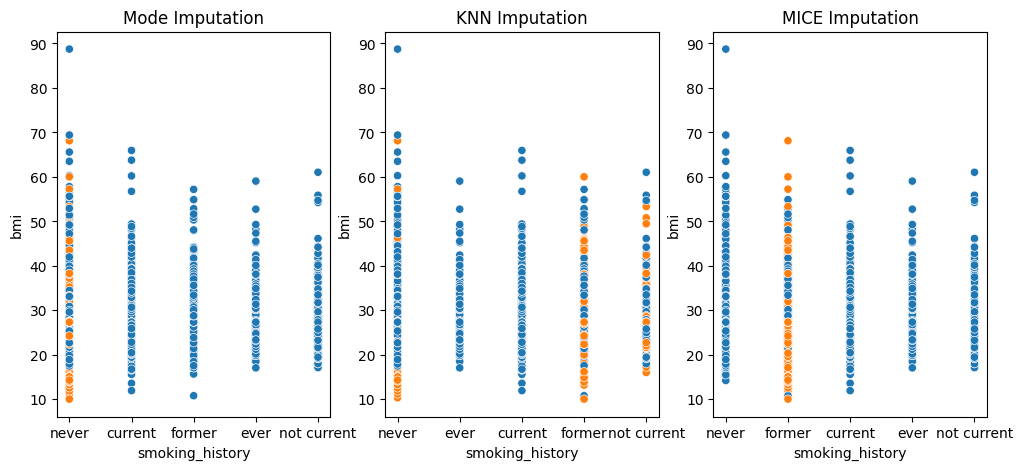

In [27]:
fig, axes=plt.subplots(1, 3, figsize=(12, 5))
nullity=data.smoking_history.isnull()
imputations={
    'Mode Imputation': data_mode,
    'KNN Imputation': data_knn,
    'MICE Imputation': data_mice
}
for ax, i in zip(axes.flatten(), imputations):
  sns.scatterplot(imputations[i], x='smoking_history', y='bmi', ax=ax, hue=nullity, legend=False)
  ax.set_title(i)

From the above scatterplot we can clearly see that KNN imputation works the best as compared to the other two so we will proceed with the KNN data.

In [28]:
cleaned_data=data.copy(deep=True) # Creating a copy of the data replacing the null values with knn values

In [29]:
for i in cleaned_data.index:
  cleaned_data.loc[i,['smoking_history']]=data_knn.loc[i,['smoking_history']]

In [30]:
cleaned_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,ever,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


**Dealing with the outliers**

<Axes: ylabel='blood_glucose_level'>

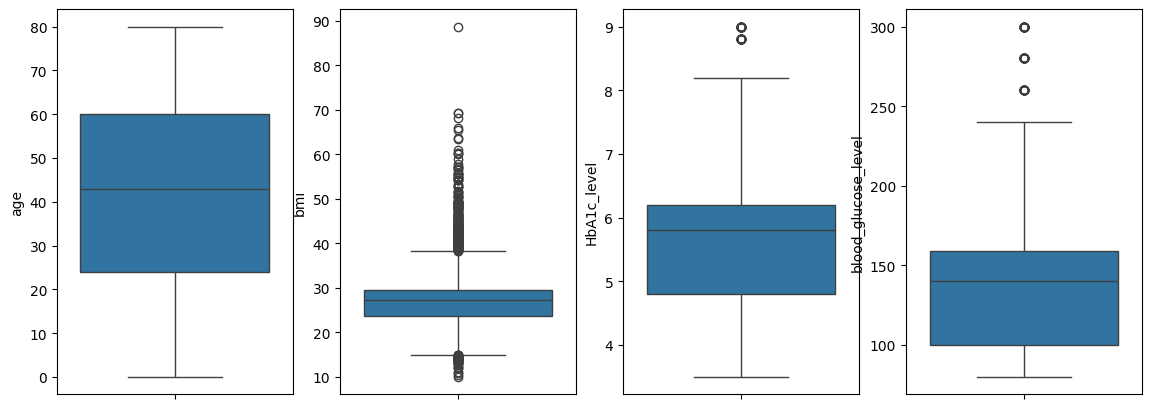

In [31]:
fig, axes=plt.subplots(1,4, figsize=(14, 5)) # Checking for outliers
sns.boxplot(data=cleaned_data, y='age', ax=axes[0])
sns.boxplot(data=cleaned_data, y='bmi', ax=axes[1])
sns.boxplot(data=cleaned_data, y='HbA1c_level', ax=axes[2])
sns.boxplot(data=cleaned_data, y='blood_glucose_level', ax=axes[3])

BMI, HBAIC_level and Blood Glucose level contains outliers hence we have to deal with these outliers and since the number of outliers is also significant we will go for capping the outliers

In [32]:
# Capping the outliers
numerical_columns=['bmi', 'HbA1c_level', 'blood_glucose_level']
for i in numerical_columns:
  Q3=cleaned_data[i].quantile(0.75)
  Q1=cleaned_data[i].quantile(0.25)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  cleaned_data[i].clip(lower=lower_limit, upper=upper_limit, inplace=True)

<Axes: ylabel='blood_glucose_level'>

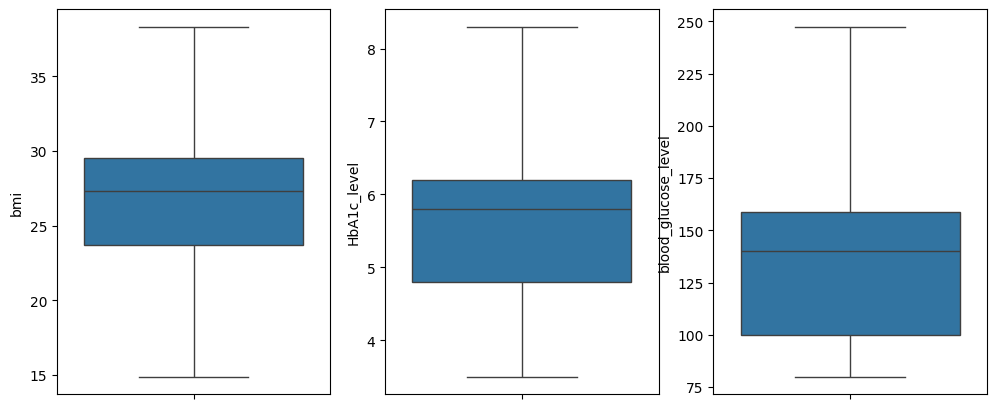

In [33]:
fig, axes=plt.subplots(1,3, figsize=(12, 5))
sns.boxplot(data=cleaned_data, y='bmi', ax=axes[0])
sns.boxplot(data=cleaned_data, y='HbA1c_level', ax=axes[1])
sns.boxplot(data=cleaned_data, y='blood_glucose_level', ax=axes[2])

**Checking the skewness of the numerical columns**

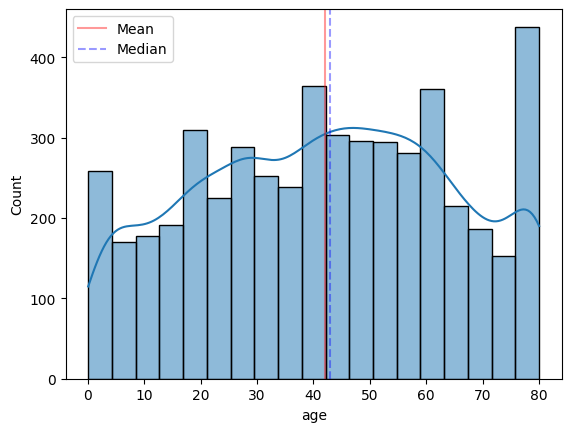

In [34]:
# Checking the skewness of all the numerical variables
sns.histplot(data=cleaned_data, x='age', kde=True)
plt.axvline(x=cleaned_data.age.mean(), color='red', alpha=0.4, label='Mean')
plt.axvline(x=cleaned_data.age.median(), color='blue', ls='--', alpha=0.4, label='Median')
plt.legend()

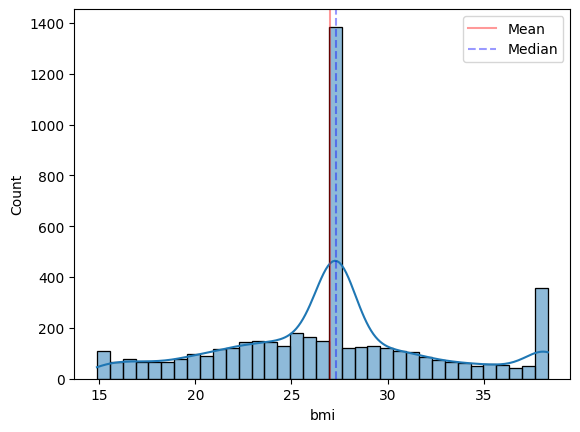

In [35]:
sns.histplot(data=cleaned_data, x='bmi', kde=True)
plt.axvline(x=cleaned_data.bmi.mean(), color='red', alpha=0.4, label='Mean')
plt.axvline(x=cleaned_data.bmi.median(), color='blue', ls='--', alpha=0.4, label='Median')
plt.legend()

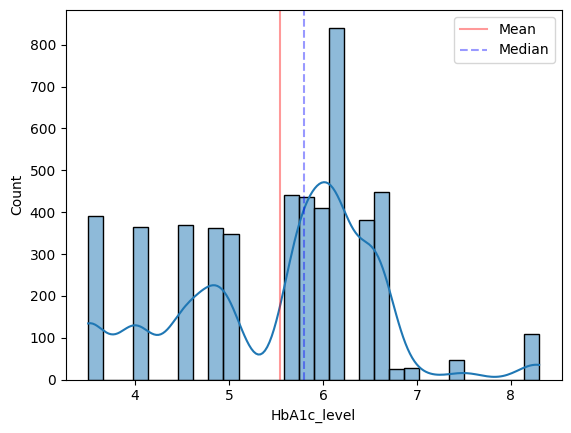

In [36]:
sns.histplot(data=cleaned_data, x='HbA1c_level', kde=True)
plt.axvline(x=cleaned_data.HbA1c_level.mean(), color='red', alpha=0.4, label='Mean')
plt.axvline(x=cleaned_data.HbA1c_level.median(), color='blue', ls='--', alpha=0.4, label='Median')
plt.legend()

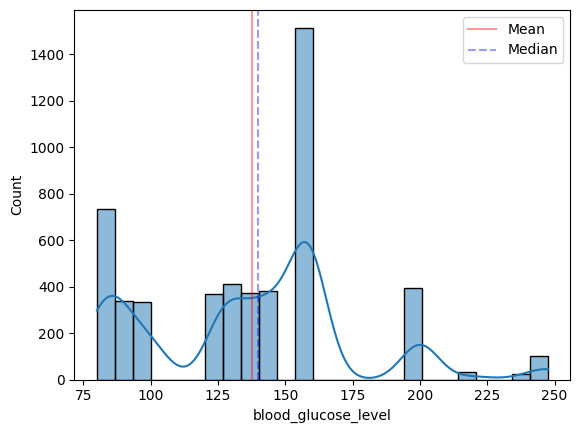

In [37]:
sns.histplot(data=cleaned_data, x='blood_glucose_level', kde=True)
plt.axvline(x=cleaned_data.blood_glucose_level.mean(), color='red', alpha=0.4, label='Mean')
plt.axvline(x=cleaned_data.blood_glucose_level.median(), color='blue', ls='--', alpha=0.4, label='Median')
plt.legend()

None of the numerical variables is normally distributed

**Visualization of the data**

<Axes: xlabel='gender', ylabel='count'>

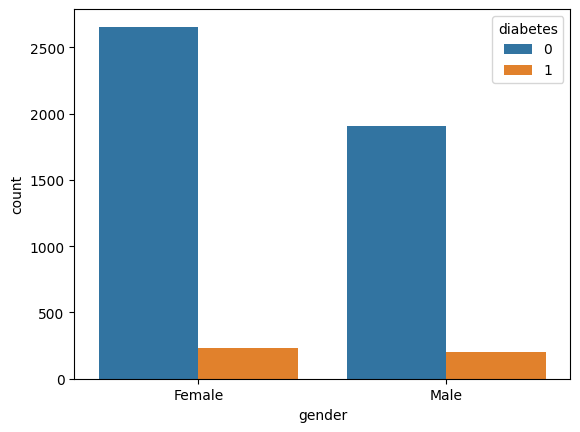

In [38]:
sns.countplot(data=cleaned_data, x='gender', hue='diabetes')

Based on gender we don't see any significant difference between the two.

<Axes: xlabel='diabetes', ylabel='age'>

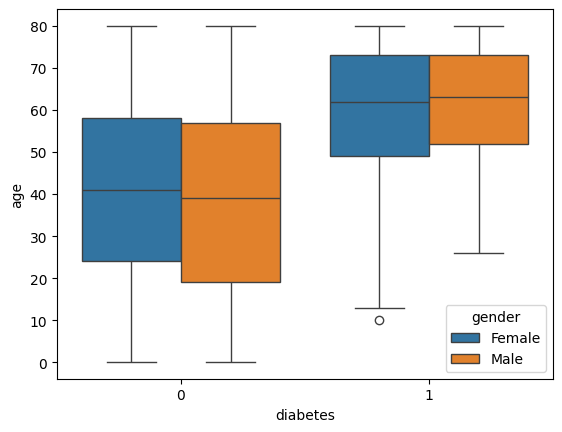

In [39]:
sns.boxplot(data=cleaned_data, y='age', x='diabetes', hue='gender')

The age is a major factor in diabetes. More than 75% of the people having diabetes are above 50 years of age in both the genders.

<Axes: xlabel='hypertension', ylabel='count'>

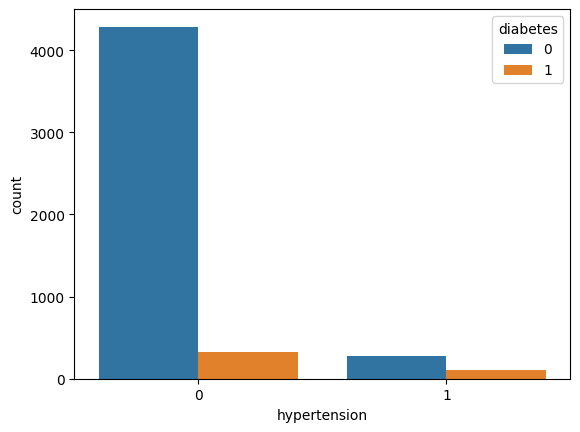

In [40]:
sns.countplot(data=cleaned_data, x='hypertension', hue='diabetes')

<Axes: xlabel='heart_disease', ylabel='count'>

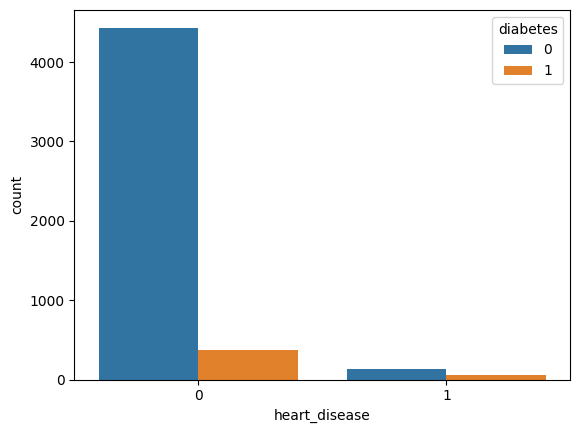

In [41]:
sns.countplot(data=cleaned_data, x='heart_disease', hue='diabetes')

<Axes: xlabel='smoking_history', ylabel='count'>

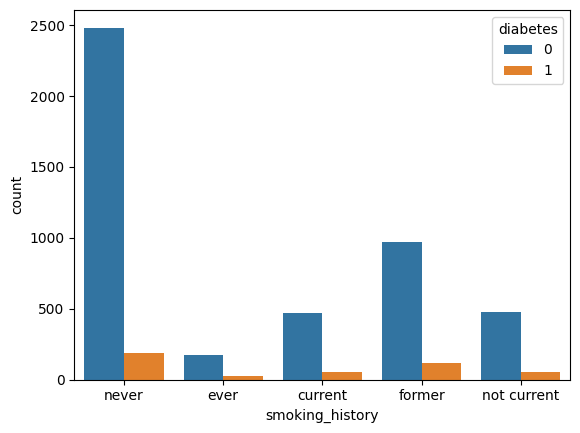

In [42]:
sns.countplot(data=cleaned_data, x='smoking_history', hue='diabetes')

Hypertension, heart disease and smoking history doesn't show much of a relation with diabetes according to the data.

<Axes: xlabel='diabetes', ylabel='bmi'>

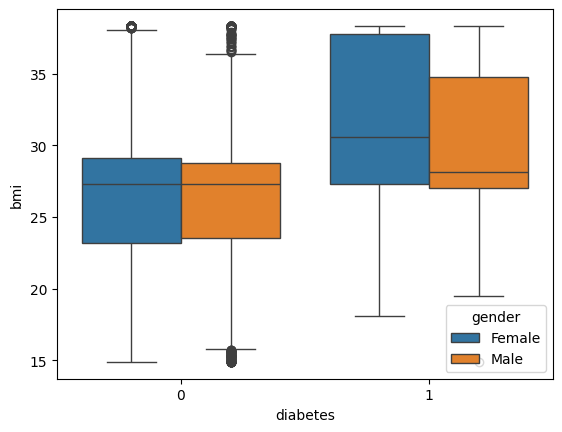

In [43]:
sns.boxplot(data=cleaned_data, x='diabetes', y='bmi', hue='gender')

The chances of developing diabetes increases with the increase in Body Mass Index. BMI index lower than 25 lowers the risk of developing diabetes by 75%.

<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

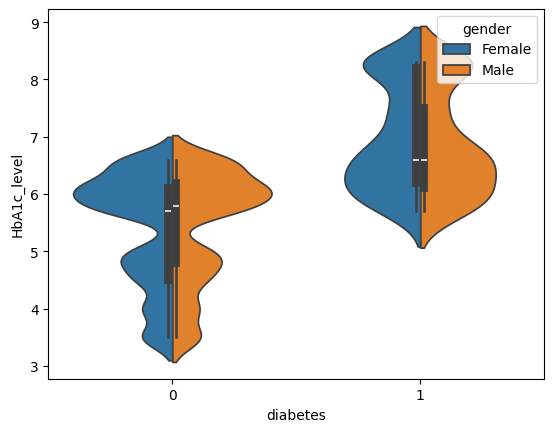

In [44]:
sns.violinplot(data=cleaned_data, x='diabetes', y='HbA1c_level', hue='gender', split=True)

HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Individuals having HbA1c level more than 6 are highly susceptible to diabetes.

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

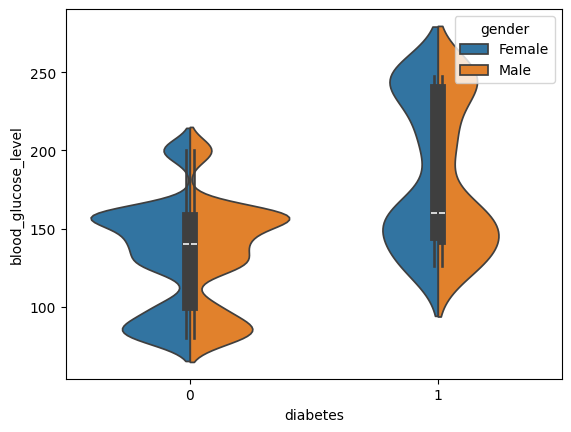

In [45]:
sns.violinplot(data=cleaned_data, x='diabetes', y='blood_glucose_level', hue='gender', split=True)

With the increase of blood glucose level from the mark of 100 the chances of developing diabetes also increases. Blood glucose level under 100 are less prone to diabetes.

We will use knn data for further analsis since it replaces null values best compared to other methods.

In [46]:
data_knn.loc[:, ['smoking_history']]=encoder1.fit_transform(data_knn.loc[:, ['smoking_history']])

In [47]:
data_knn=data_knn.astype(float)

In [48]:
data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender_Male          5000 non-null   float64
 1   age                  5000 non-null   float64
 2   hypertension         5000 non-null   float64
 3   heart_disease        5000 non-null   float64
 4   smoking_history      5000 non-null   float64
 5   bmi                  5000 non-null   float64
 6   HbA1c_level          5000 non-null   float64
 7   blood_glucose_level  5000 non-null   float64
 8   diabetes             5000 non-null   float64
dtypes: float64(9)
memory usage: 351.7 KB


In [49]:
data_knn.isnull().sum()

,0
gender_Male,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Since the data is not normally distributed we will use spearman correlation method to check the relation between the variables

In [50]:
data_knn.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,gender_Male,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender_Male,1.000000,-0.033578,0.001155,0.053457,0.030637,-0.013236,0.030012,0.001495,0.027157
age,-0.033578,1.000000,0.248544,0.238024,0.215875,0.336090,0.098738,0.084141,0.261344
hypertension,0.001155,0.248544,1.000000,0.115898,0.015819,0.154231,0.057192,0.071536,0.203995
heart_disease,0.053457,0.238024,0.115898,1.000000,0.059569,0.062017,0.075161,0.061575,0.155774
smoking_history,0.030637,0.215875,0.015819,0.059569,1.000000,0.127559,0.018914,0.032752,0.059304
bmi,-0.013236,0.336090,0.154231,0.062017,0.127559,1.000000,0.059826,0.042371,0.184381
HbA1c_level,0.030012,0.098738,0.057192,0.075161,0.018914,0.059826,1.000000,0.066957,0.353006
blood_glucose_level,0.001495,0.084141,0.071536,0.061575,0.032752,0.042371,0.066957,1.000000,0.272131
diabetes,0.027157,0.261344,0.203995,0.155774,0.059304,0.184381,0.353006,0.272131,1.000000


From the above table we can see that diabetes is moderately correlated to HbA1c_level(Blood Sugar level) ,blood_glucose_level and age and very little correlated to hypertension, bmi and heart_disease.

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # checking for multicolinearity
vif=pd.DataFrame()
X=data_knn.drop(['diabetes'], axis=1)
y=data_knn['diabetes']
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

              Features        VIF
0          gender_Male   1.715334
1                  age   5.642608
2         hypertension   1.158064
3        heart_disease   1.106804
4      smoking_history   1.633023
5                  bmi  14.975083
6          HbA1c_level  16.870753
7  blood_glucose_level  11.301984


For any column having VIF_value>5 there exists high correlation between the variables so we should drop those columns. But by droping those columns, we will miss out the crucial columns which are very important for diabetes prdiction. So instead of droping those columns we will avoid using parametric ML models for the prediction.

In [52]:
from sklearn.preprocessing import StandardScaler # Feature scaling of the independent variables
ss=StandardScaler()
X=ss.fit_transform(X)

In [53]:
from sklearn.model_selection import train_test_split # Spliting the data into 80-20 for training and testing
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
X_train

array([[-0.85481148, -0.44707224, -0.29045392, ...,  4.0715656 ,
         0.14217256,  0.16881306],
       [ 1.16984859, -1.51205484, -0.29045392, ..., -1.17597428,
        -1.4268573 , -1.17793031],
       [-0.85481148, -0.13645232, -0.29045392, ...,  0.0233788 ,
         0.51135606,  0.51162046],
       ...,
       [ 1.16984859, -1.11268637, -0.29045392, ..., -1.36550168,
         0.88053956, -1.42279274],
       [-0.85481148, -0.49144652, -0.29045392, ..., -0.00623486,
         0.23446844, -0.93306788],
       [ 1.16984859, -1.81202494, -0.29045392, ..., -1.40251875,
         0.41906019, -1.42279274]])

# **Machine Learning Models**

**Decision Tree Classifier**

In [55]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Checking the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.948
[[886  26]
 [ 26  62]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       912
         1.0       0.70      0.70      0.70        88

    accuracy                           0.95      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.95      0.95      0.95      1000



**Hyperparameter Tuning using Randomized Search CV:** Here we will use Randomized Search CV for hypertuning. The reason we use Randomized Search CV instead of Search Grid CV is beacause it consumes less RAM and takes less time comparatively.

In [57]:
parameters={
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

In [58]:
from sklearn.model_selection import RandomizedSearchCV # Hyperparameter tuning
rs=RandomizedSearchCV(dt, parameters, cv=5, n_iter=100, n_jobs=-1, scoring='accuracy')
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [59]:
print(rs.best_params_)
print(rs.best_score_)

{'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 6, 'criterion': 'entropy', 'class_weight': None}
0.9700000000000001


In [60]:
dt=DecisionTreeClassifier(splitter='best', min_samples_split=3, min_samples_leaf=7, max_features='log2', max_depth=6, criterion='entropy', class_weight=None)
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

In [61]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.964
[[912   0]
 [ 36  52]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       912
         1.0       1.00      0.59      0.74        88

    accuracy                           0.96      1000
   macro avg       0.98      0.80      0.86      1000
weighted avg       0.97      0.96      0.96      1000



Hyperparameter Tuning for Decision Tree Classifier gives us better result.

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.966
[[911   1]
 [ 33  55]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       912
         1.0       0.98      0.62      0.76        88

    accuracy                           0.97      1000
   macro avg       0.97      0.81      0.87      1000
weighted avg       0.97      0.97      0.96      1000



**Hyperparameter Tuning using Randomized Search CV**

In [ ]:
parameters={
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [1, 3, 5, 7, 9],
    'min_samples_leaf': [1, 3, 5, 7, 9],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

In [ ]:
rs=RandomizedSearchCV(rf, parameters, cv=5, n_iter=100, n_jobs=-1, scoring='accuracy')
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [1, 3, 5, 7, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy')

In [ ]:
print(rs.best_params_)
print(rs.best_score_)

{'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'entropy', 'class_weight': None}
0.9717500000000001


In [ ]:
rf=RandomForestClassifier(n_estimators=100, min_samples_split=3, min_samples_leaf=5, max_features='sqrt', max_depth=6, criterion='entropy', class_weight=None)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.967
[[912   0]
 [ 33  55]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       912
         1.0       1.00      0.62      0.77        88

    accuracy                           0.97      1000
   macro avg       0.98      0.81      0.88      1000
weighted avg       0.97      0.97      0.96      1000



Hyperparameter Tuning improves the models performance just by 0.001 for Random Forest Classifier

**AdaBoost Classifier**

In [62]:
from sklearn.ensemble import AdaBoostClassifier # AdaBoost Classifier
ab=AdaBoostClassifier()
ab.fit(X_train, y_train)
y_pred=ab.predict(X_test)

In [63]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.965
[[909   3]
 [ 32  56]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       912
         1.0       0.95      0.64      0.76        88

    accuracy                           0.96      1000
   macro avg       0.96      0.82      0.87      1000
weighted avg       0.96      0.96      0.96      1000



**Hyperparameter Tuning using Randomized Search CV**

In [64]:
parameters={
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.5, 2],
    'algorithm': ['SAMME', 'SAMME.R'],
}

In [65]:
rs=RandomizedSearchCV(ab, parameters, cv=5, n_iter=100, n_jobs=-1, scoring='accuracy')
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.2, 0.4, 0.6, 0.8, 1,
                                                          1.5, 2],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy')

In [66]:
print(rs.best_params_)
print(rs.best_score_)

{'n_estimators': 100, 'learning_rate': 0.8, 'algorithm': 'SAMME.R'}
0.9724999999999999


In [67]:
ab=AdaBoostClassifier(n_estimators=100, learning_rate=0.8, algorithm='SAMME.R')
ab.fit(X_train, y_train)
y_pred=ab.predict(X_test)

In [68]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.965
[[909   3]
 [ 32  56]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       912
         1.0       0.95      0.64      0.76        88

    accuracy                           0.96      1000
   macro avg       0.96      0.82      0.87      1000
weighted avg       0.96      0.96      0.96      1000



For AdaBoost Classifier Hyperparameter Tuning doesn't bring any change, it is the same

**Gradient Boosting Classifier**

In [69]:
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Classifier
gb=GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred=gb.predict(X_test)

In [70]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.965
[[909   3]
 [ 32  56]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       912
         1.0       0.95      0.64      0.76        88

    accuracy                           0.96      1000
   macro avg       0.96      0.82      0.87      1000
weighted avg       0.96      0.96      0.96      1000



**Hyperparameter Tuning using Randomized Search CV**

In [71]:
parameters={
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.5, 2],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'loss': ['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'mse', 'mae']
}

In [72]:
rs=RandomizedSearchCV(gb, parameters, cv=5, n_iter=100, n_jobs=-1, scoring='accuracy')
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.2, 0.4, 0.6, 0.8, 1,
                                                          1.5, 2],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1]},
                   scoring='accuracy')

In [73]:
print(rs.best_params_)
print(rs.best_score_)

{'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 8, 'loss': 'exponential', 'learning_rate': 1, 'criterion': 'friedman_mse'}
0.966


In [75]:
gb=GradientBoostingClassifier(subsample=0.9, n_estimators=300, min_samples_split=6, min_samples_leaf=9, max_features='sqrt', max_depth=8, loss='exponential', learning_rate=1, criterion='friedman_mse')
gb.fit(X_train, y_train)
y_pred=gb.predict(X_test)

In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.961
[[902  10]
 [ 29  59]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       912
         1.0       0.86      0.67      0.75        88

    accuracy                           0.96      1000
   macro avg       0.91      0.83      0.87      1000
weighted avg       0.96      0.96      0.96      1000



Hyperparameter Tuning for Gradient Boosting Classifier worsens the prediction, so it is better without hyperparameter tuning.

**XGBoost Classifier**

In [77]:
from xgboost import XGBClassifier # XGBoost Classifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)

In [78]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.96
[[902  10]
 [ 30  58]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       912
         1.0       0.85      0.66      0.74        88

    accuracy                           0.96      1000
   macro avg       0.91      0.82      0.86      1000
weighted avg       0.96      0.96      0.96      1000



**Hyperparameter Tuning using Randomized Search CV**

In [79]:
parameters={
    'booster': ['gbtree', 'gblinear', 'dart'],
    'eta': [0.2, 0.4, 0.6, 0.8, 1],
    'gamma': [0, 0.2, 0.4, 0.6, 0.8, 1],
    'max_depth': [2, 4, 6, 8, 10],
    'min_child_weight': [1, 3, 5, 7, 9, 10],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
}

In [80]:
rs=RandomizedSearchCV(xgb, parameters, cv=5, n_iter=100, n_jobs=-1, scoring='accuracy')
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'eta': [0.2, 0.4, 0.6, 0.8, 1],
                                        'gamma': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7, 9, 10],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1]},
                   scoring='accuracy')

In [81]:
print(rs.best_params_)
print(rs.best_score_)

{'subsample': 1, 'min_child_weight': 9, 'max_depth': 6, 'gamma': 1, 'eta': 0.2, 'booster': 'gbtree'}
0.9702500000000001


In [82]:
xgb=XGBClassifier(subsample=1, min_child_weight=9, max_depth=6, gamma=1, eta=0.2, booster='gbtree')
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)

In [83]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.965
[[910   2]
 [ 33  55]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       912
         1.0       0.96      0.62      0.76        88

    accuracy                           0.96      1000
   macro avg       0.96      0.81      0.87      1000
weighted avg       0.96      0.96      0.96      1000



Hyperparameter Tuning works best for XGBoost Classifier in improving the prediction

**Support Vector Classifier**

In [84]:
from sklearn.svm import SVC # Support Vector Classifier
svc=SVC()
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

In [85]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.959
[[911   1]
 [ 40  48]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       912
         1.0       0.98      0.55      0.70        88

    accuracy                           0.96      1000
   macro avg       0.97      0.77      0.84      1000
weighted avg       0.96      0.96      0.95      1000



**Hyperparameter Tuning using Randomized Search CV**

In [86]:
parameters={
    'C': [0.2, 0.4, 0.6, 0.8, 1, 1.5, 2],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'gamma': ['scale', 'auto'],
    'coef0': [0, 0.2, 0.4, 0.6, 0.8, 1],
    'shrinking': [True, False],
    'probability': [True, False],
    'class_weight': ['balanced', None],
    'decision_function_shape': ['ovo', 'ovr'],
}

In [87]:
rs=RandomizedSearchCV(svc, parameters, cv=5, n_iter=100, n_jobs=-1, scoring='accuracy')
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.2, 0.4, 0.6, 0.8, 1, 1.5, 2],
                                        'class_weight': ['balanced', None],
                                        'coef0': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'probability': [True, False],
                                        'shrinking': [True, False]},
                   scoring='accuracy')

In [88]:
print(rs.best_params_)
print(rs.best_score_)

{'shrinking': False, 'probability': False, 'kernel': 'poly', 'gamma': 'auto', 'degree': 2, 'decision_function_shape': 'ovo', 'coef0': 0.6, 'class_weight': None, 'C': 1.5}
0.96275


In [89]:
svc=SVC(shrinking=False, probability=False, kernel='poly', gamma='auto', degree=2, decision_function_shape='ovo', coef0=0.6, class_weight=None, C=1.5)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

In [90]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.964
[[911   1]
 [ 35  53]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       912
         1.0       0.98      0.60      0.75        88

    accuracy                           0.96      1000
   macro avg       0.97      0.80      0.86      1000
weighted avg       0.96      0.96      0.96      1000



Hyperparameter Tuning for Support Vector Classifier improves the prediction of the model

**KNN Classifier**

In [91]:
from sklearn.neighbors import KNeighborsClassifier # KNN Classifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [92]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.954
[[907   5]
 [ 41  47]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       912
         1.0       0.90      0.53      0.67        88

    accuracy                           0.95      1000
   macro avg       0.93      0.76      0.82      1000
weighted avg       0.95      0.95      0.95      1000



**Hyperparameter Tuning using Randomized Search CV**

In [93]:
parameters={
    'n_neighbors': [3, 5, 7, 9, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2, 3, 4, 5],
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev', 'wminkowski', 'seuclidean', 'mahalanobis']
}

In [94]:
rs=RandomizedSearchCV(knn, parameters, cv=5, n_iter=100, n_jobs=-1, scoring='accuracy')
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 40, 50],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan', 'chebyshev',
                                                   'wminkowski', 'seuclidean',
                                                   'mahalanobis'],
                                        'n_neighbors': [3, 5, 7, 9, 13, 15],
                                        'p': [1, 2, 3, 4, 5],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [95]:
print(rs.best_params_)
print(rs.best_score_)

{'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'metric': 'euclidean', 'leaf_size': 50, 'algorithm': 'brute'}
0.9540000000000001


In [97]:
knn=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute', leaf_size=50, p=1, metric='euclidean')
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [98]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.954
[[907   5]
 [ 41  47]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       912
         1.0       0.90      0.53      0.67        88

    accuracy                           0.95      1000
   macro avg       0.93      0.76      0.82      1000
weighted avg       0.95      0.95      0.95      1000



Hyperparameter Tuning for KNN classifier doesn't bring any substantial change in the prediction of the model.

**Conclusion:** Here we tried 7 non-parametric Machine Learning classification models with Hyperparameter Tuning each and out of all the models Random Forest Classifier with Hyperparameter Tuning gives us the best prediction with the accuracy score of 0.967.